In [1]:
install.packages('quantmod')
library(quantmod)

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmpas4FU4\downloaded_packages


Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [362]:
BTC3 <- getSymbols("XWD.TO",src="yahoo",auto.assign=FALSE)
BTC3 <- na.omit(BTC3)
BTC3 <- BTC3["2009-11-01/2020-03-25"]
head(BTC3)

           XWD.TO.Open XWD.TO.High XWD.TO.Low XWD.TO.Close XWD.TO.Volume
2009-11-02       22.21       22.21      22.04        22.15          4000
2009-11-03       21.92       22.05      21.92        21.94          7500
2009-11-04       22.12       22.29      22.12        22.12         12700
2009-11-05       22.12       22.12      22.12        22.12             0
2009-11-06       22.45       22.70      22.43        22.70          2800
2009-11-09       22.61       22.87      22.61        22.87          1600
           XWD.TO.Adjusted
2009-11-02        18.02447
2009-11-03        17.85358
2009-11-04        18.00006
2009-11-05        18.00006
2009-11-06        18.47203
2009-11-09        18.61037

In [363]:
tail(BTC3)

           XWD.TO.Open XWD.TO.High XWD.TO.Low XWD.TO.Close XWD.TO.Volume
2020-03-18       43.20       45.16      42.94        44.18         70600
2020-03-19       44.09       45.90      43.33        45.05        465900
2020-03-20       44.94       45.25      42.97        43.10        445800
2020-03-23       42.89       43.48      41.76        42.38        447700
2020-03-24       44.57       46.15      44.56        46.15        153100
2020-03-25       46.01       47.52      45.48        46.11         91900
           XWD.TO.Adjusted
2020-03-18        43.67651
2020-03-19        44.53659
2020-03-20        42.60881
2020-03-23        41.89702
2020-03-24        45.62406
2020-03-25        45.58451

In [364]:
BTC3 <- BTC3[ ,-c(2,3,4,5)]
head(BTC3)

           XWD.TO.Open XWD.TO.Adjusted
2009-11-02       22.21        18.02447
2009-11-03       21.92        17.85358
2009-11-04       22.12        18.00006
2009-11-05       22.12        18.00006
2009-11-06       22.45        18.47203
2009-11-09       22.61        18.61037

In [365]:
BTC3 <- BTC3[ ,-c(1)]
head(BTC3)

           XWD.TO.Adjusted
2009-11-02        18.02447
2009-11-03        17.85358
2009-11-04        18.00006
2009-11-05        18.00006
2009-11-06        18.47203
2009-11-09        18.61037

In [366]:
colnames(BTC3)[colnames(BTC3) == "XWD.TO.Adjusted"] <- "TR"

In [367]:
head(BTC3)

                 TR
2009-11-02 18.02447
2009-11-03 17.85358
2009-11-04 18.00006
2009-11-05 18.00006
2009-11-06 18.47203
2009-11-09 18.61037

In [368]:
logret <- diff(log(BTC3$TR))  # diff function gives us the return
head(logret,3)

                     TR
2009-11-02           NA
2009-11-03 -0.009525951
2009-11-04  0.008170986

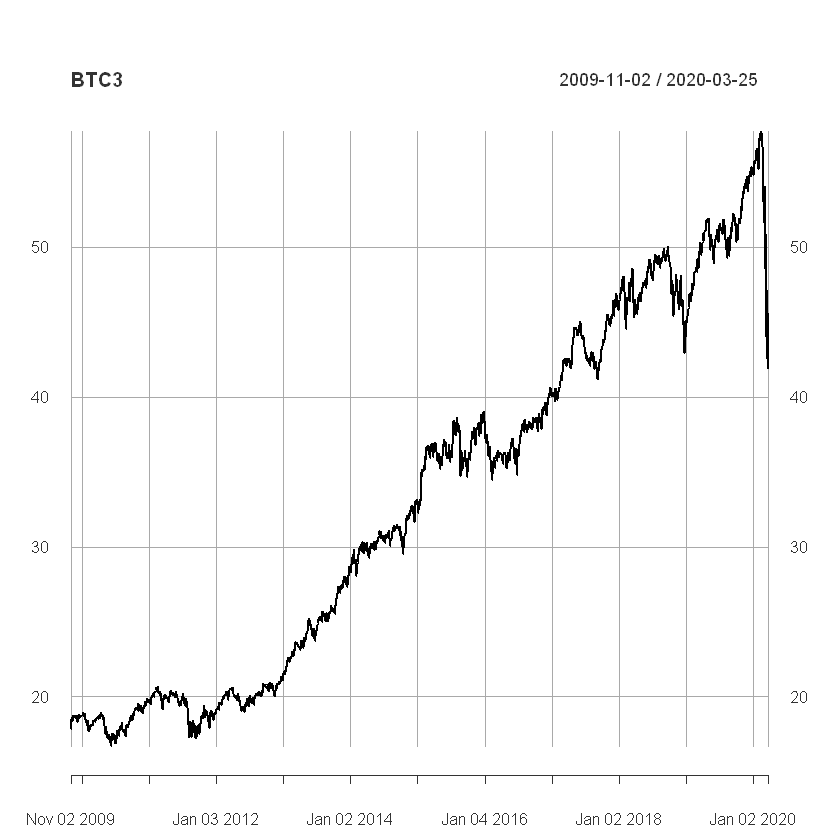

In [369]:
plot(BTC3)

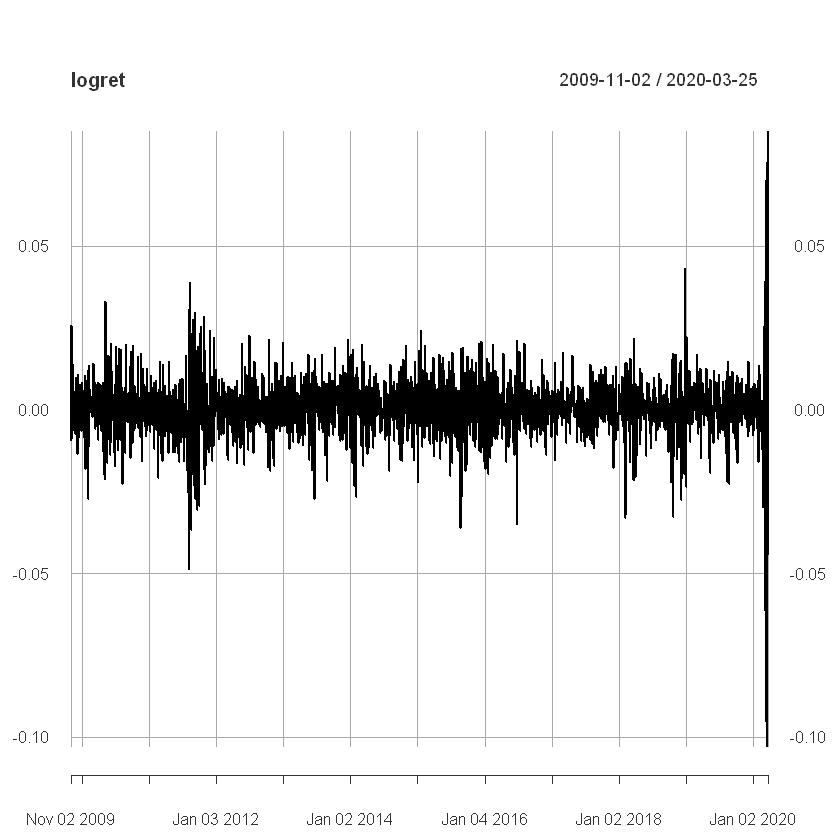

In [370]:
plot(logret)

In [371]:
# The R code to find log-return, removing missing First Observation

logret <- diff(log(BTC3$TR))[-1]
round(head(logret,3),6)   # round function to display 6 decimals

# First Value interpretation 
# Stock-index fell by 0.95%

                  TR
2009-11-03 -0.009526
2009-11-04  0.008171
2009-11-05  0.000000

In [372]:
# Now Calculate the discreet Return from the formula of exp.
ret <- exp(logret)-1  #To go from log return to simple return,
round(head(ret,3),6)

                  TR
2009-11-03 -0.009481
2009-11-04  0.008204
2009-11-05  0.000000

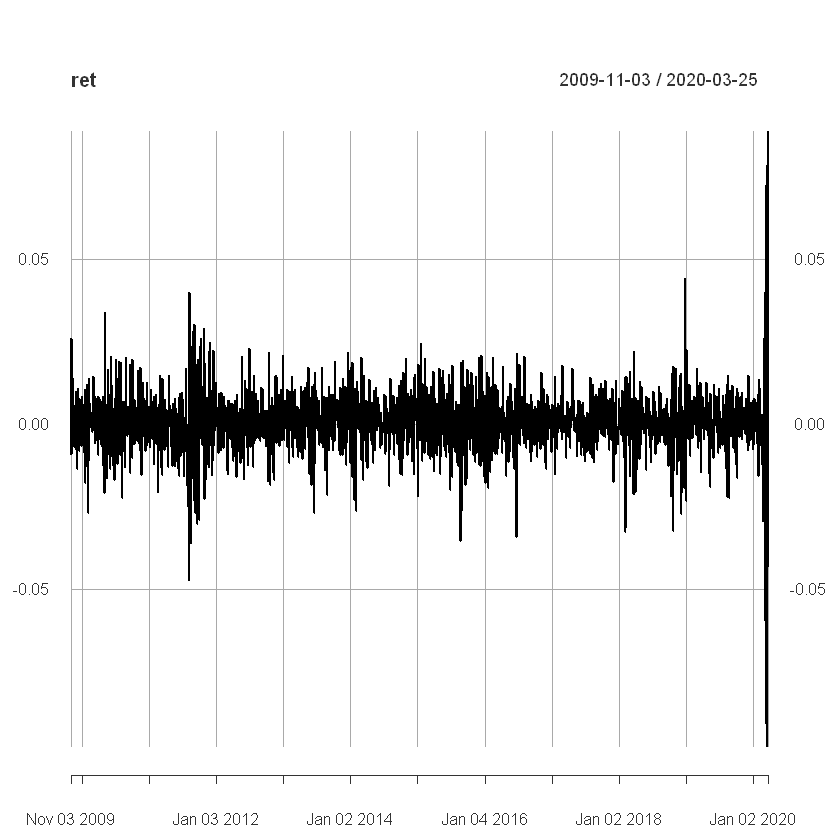

In [373]:
plot(ret)

In [374]:
# Weekly log-return

logret_w <- apply.weekly(BTC3,sum)

round(head(logret_w,3),6)

                 TR
2009-11-06 90.35021
2009-11-13 92.35201
2009-11-20 93.41801

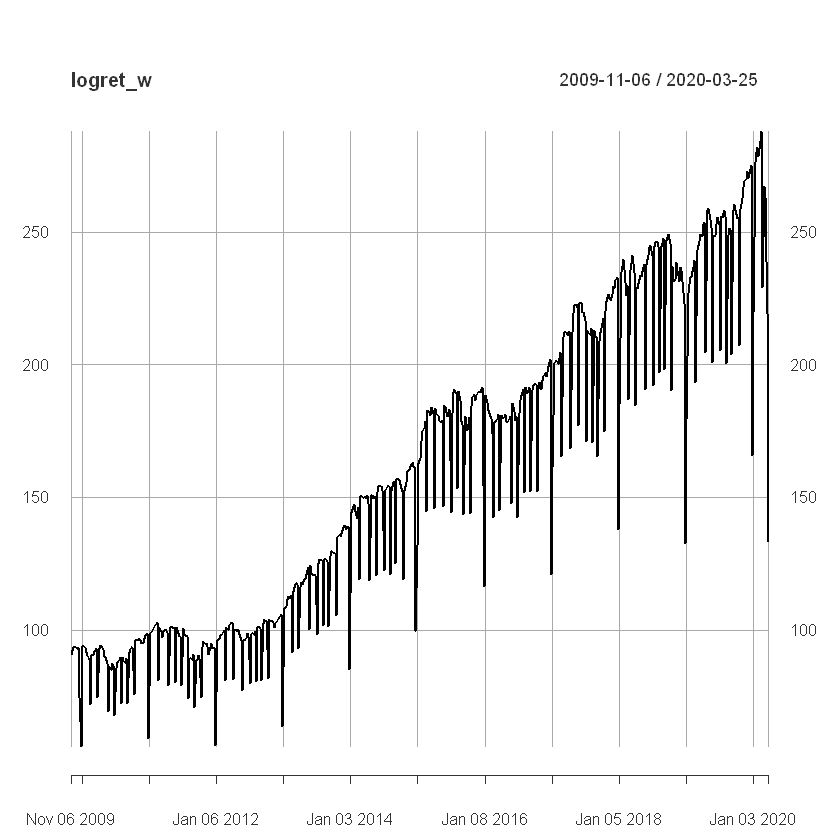

In [375]:
plot(logret_w)

In [376]:
# Calculate discrete return from log-return

ret_w <- exp(logret_w)-1

round(tail(ret_w,3),6)

                      TR
2020-03-13 6.164231e+103
2020-03-20  1.779131e+95
2020-03-25  6.412445e+57

In [377]:
#monthly
logret_w1 <- apply.monthly(BTC3,sum)

round(head(logret_w1,3),6)

                 TR
2009-11-30 387.8882
2009-12-31 391.6613
2010-01-29 372.8896

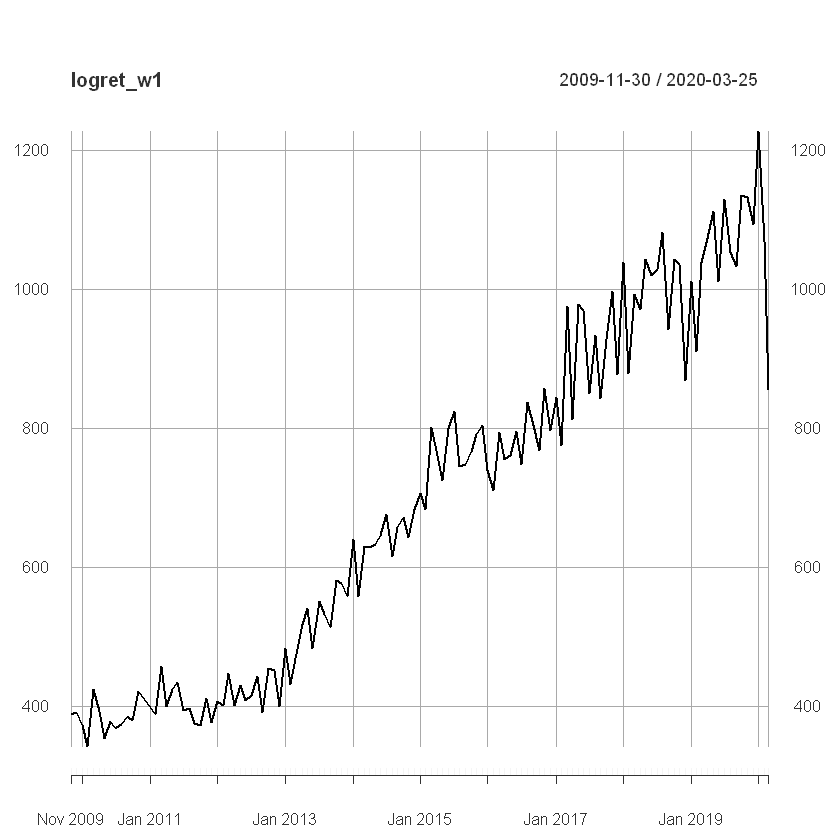

In [378]:
plot(logret_w1)

In [379]:
# Distribution of log-returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(logret),8)

sig <- round(sd(logret),8)

mu
sig

[1] 0.00035577

[1] 0.00917699

In [380]:
var <- round(qnorm(0.05,mu,sig),6) # quantile for the normal distribution  # VAR value is -1.5% 
var
# 0.05 denotes the quantile we want

[1] -0.014739

In [381]:
#If returns are normally calculated , then VAR and ES are easly calculated


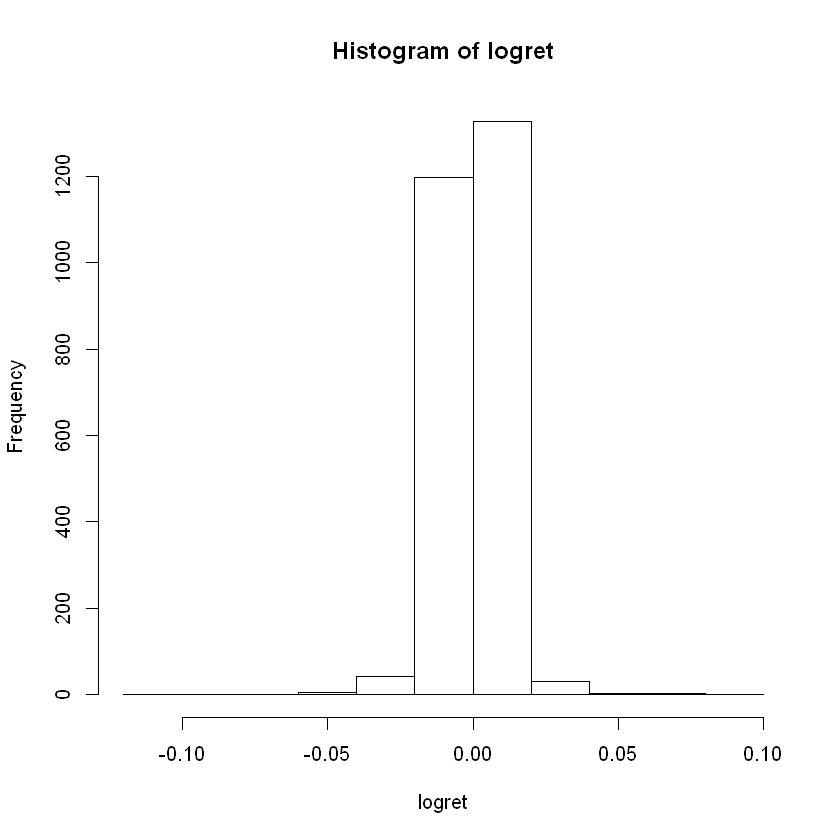

In [382]:
hist(logret)

In [383]:
(exp(var)-1) * 1000000

[1] -14630.91

In [384]:
(exp(var)-1) # First convert var into discrete returns

[1] -0.01463091

In [385]:
# ES - If the outcome were to be worse than -1.7% then the ES is the expected loss

In [386]:
# Calculating 1-day 95% Expected Shortfall for alpha = 0.05 during the case of normal distribution
es <- mu-sig*dnorm(qnorm(0.05,0,1),0,1)/0.05
es
# It means if the log-return is worse than -1.5% then the avg. loss is abt -1.9%

[1] -0.01857372

In [387]:
# If funds fall below 2.2% 
(exp(es)-1) # First convert var into discrete returns

[1] -0.0184023

In [388]:
(exp(es)-1) * 1000000  # es converted into discrete returns

[1] -18402.3

In [389]:
# Next wld be predicting AR & ES based on Simulations - Up untill now we consider the Normality Assumptions
# Week 3
#Non-Normal Distribution
#As skewness and Kurtosis has an effect on VAR & ES

In [390]:
install.packages('moments')
library(moments)

Warning message:
"package 'moments' is in use and will not be installed"

In [391]:
install.packages('MASS')
library(MASS)

Warning message:
"package 'MASS' is in use and will not be installed"

In [392]:
install.packages('metRology')
library(metRology)

Warning message:
"package 'metRology' is in use and will not be installed"

In [393]:
install.packages("rugarch")
library(rugarch)

Warning message:
"package 'rugarch' is in use and will not be installed"

In [394]:
# Draw 100,000 outcomes from the N(mu,sig) distribution
alpha <- 0.05
set.seed(123789)    #seed value tells the computer where to start the sequence # if i do not set , then each time i get diff.set

rvec <- rnorm(100000,mu,sig)# Get a 100000 rando no.s from a random distribution   # So the result wld be different everytime

VAR <- quantile(rvec,alpha)

ES <- mean(rvec[rvec<VAR])

round(VAR,6)

round(ES,6)
# Simulation method will not give us the exact correct value as it takes an assumption on the mean and std.-deviation

5% 
-0.014817

[1] -0.018756

In [395]:
#The objective of the class is - How to re-scale the t-distribution with U , STD. dev , Kurtosis , skewness, d.o.f.
#To match the original distribution of the data
#It provides accurate VAR & Es for our data

## Re-scaledt-distribution model
# We use M-L method
# Use the fit-distribution function


In [396]:
rvec <- as.vector(logret) #Using ML method and finding the best parameters
t.fit <- fitdistr(rvec,"t")
round(t.fit$estimate,6)

Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in sqrt(diag(vc)):
"NaNs produced"

m        s       df 
0.000533 0.006786 7.908049

In [397]:
# Estimating VAR and ES for student-t distribution with the above parameters
alpha <- 0.05
set.seed(123789)
#install.packages('metRology')
#library(metRology)
rvec <- rt.scaled(100000,mean=t.fit$estimate[1],sd=t.fit$estimate[2],df=t.fit$estimate[3])
# We use rt.scaled fx to simulate data from the re-scaled t-distribution using the estimated parameters
# fIRST argument is- The no. of outcomes we want in our simulation
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])
round(VAR,6)

round(ES,6)

5% 
-0.012026

[1] -0.016504

In [398]:
# Method - B - IID simulation from empirical distribution - simulating from the actual data
alpha <- 0.05
set.seed(123789)
library(metRology)
rvec <- rep(0,100000)
for (i in 1:10){
    rvec <- rvec+sample(as.vector(logret),100000,replace=TRUE)
}
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.04349896

[1] -0.0633355

In [399]:
# Method C - Block simulation from empirical distribution
# randomly pick a block of 10 consecutive 1-day log-returns from the actual data.Add them up to get a 10-day log-return
alpha <- 0.05
set.seed(123789)
rvec <- rep(0,100000)
rdat <- as.vector(logret)
posn <- seq(from=1,to=length(rdat)-9,by=1)
rpos <- sample(posn,100000,replace=TRUE)
for (i in 1:10){
    rvec <- rvec+rdat[rpos]
    rpos <- rpos+1
}

VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.03679842

[1] -0.062591

In [400]:
# If there is some important time-dependence in our data then method B & C may give different answers

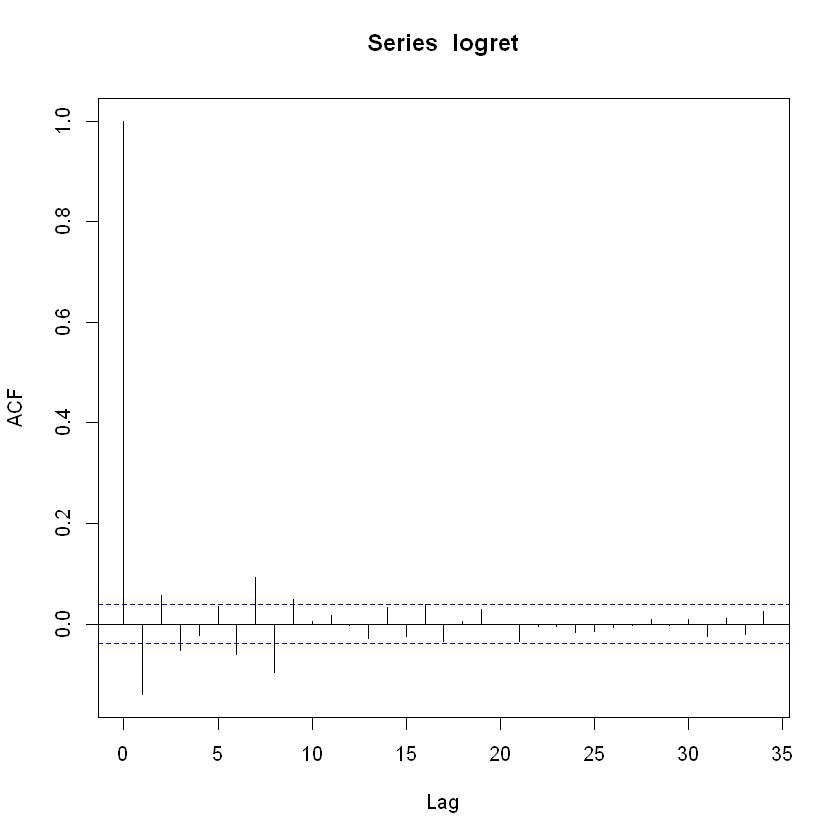

In [401]:
# Auto-correlation f(x) of logret
acf(logret) # dashed lines - 95% confidence band for the acf around 0 - As if it is outside the band - then there is significant
# Serial correlation

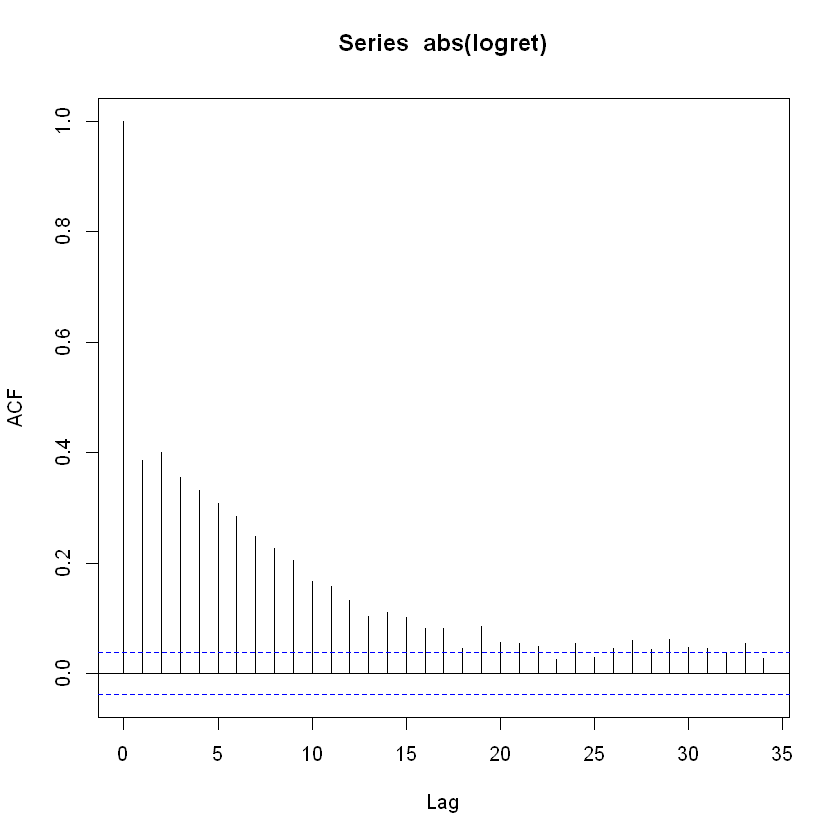

In [402]:
# Volatility Clustering
# ACF for NTC daily log-returns
acf(abs(logret)) # absolute value

In [403]:
#High serial correlations , so predictable #Testing for 2nd assumptions - above & Next below

#absolute - Large returns whether +ve /-ve = Tend to be followed by large returns- 
#This is what happens when data has clusters of volatility

#Daily index of MSCI-Devd has strong volatility clustering # Img of logreturns - therefore predictable

In [404]:
#Volatilility which is the standard deviation of log-returns
library(rugarch)

In [405]:
garch.N <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "norm")
# saving the model as garch.N

In [406]:
fit.garch.N <- ugarchfit(spec = garch.N,data = logret)
fit.garch.N


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000613    0.000135   4.5542 0.000005
omega   0.000003    0.000001   3.6007 0.000317
alpha1  0.109055    0.009802  11.1253 0.000000
beta1   0.843751    0.007686 109.7781 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000613    0.000128   4.7940 0.000002
omega   0.000003    0.000003   1.2593 0.207939
alpha1  0.109055    0.019005   5.7383 0.000000
beta1   0.843751    0.026824  31.4551 0.000000

LogLikelihood : 9034.933 

Information Criteria
------------------------------------
                    
Akaike       -6.9256
Bayes        -6.9166
Shibata      -6.9256
Hannan-Quinn -6.9223

Weig

In [407]:
# save Fitted Values 
save1 <- cbind(logret,fit.garch.N@fit$sigma,fit.garch.N@fit$z)
names(save1) <- c("logret","s","z")
# we are adding 3 columns logret +  fitted values of sqr root of fitted values of ht
# + Fitted values of et

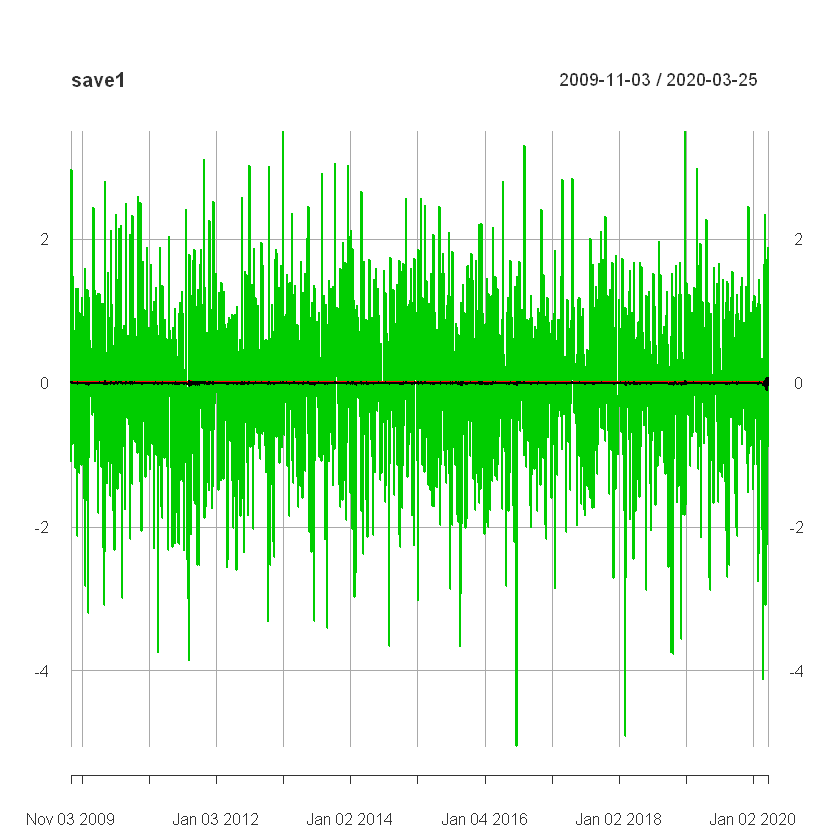

In [408]:
plot(save1)

In [409]:
head(save1)

                 logret           s           z
2009-11-03 -0.009525951 0.009178831 -1.10457559
2009-11-04  0.008170986 0.009246129  0.81744733
2009-11-05  0.000000000 0.009030888 -0.06785179
2009-11-06  0.025882601 0.008488146  2.97707412
2009-11-09  0.007460825 0.011559575  0.59241479
2009-11-10 -0.008783590 0.011002426 -0.85402544

In [410]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save1$z),8)

sig <- round(sd(save1$z),8)

mu
sig

[1] -0.03658323

[1] 1.000313

In [411]:
rvec <- as.vector(save1$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -0.31

In [412]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save1$z)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 4.32

In [413]:
# Jarque Bera test for normality

rvec <- as.vector(save1$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 231.9, p-value < 2.2e-16
alternative hypothesis: greater


In [414]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

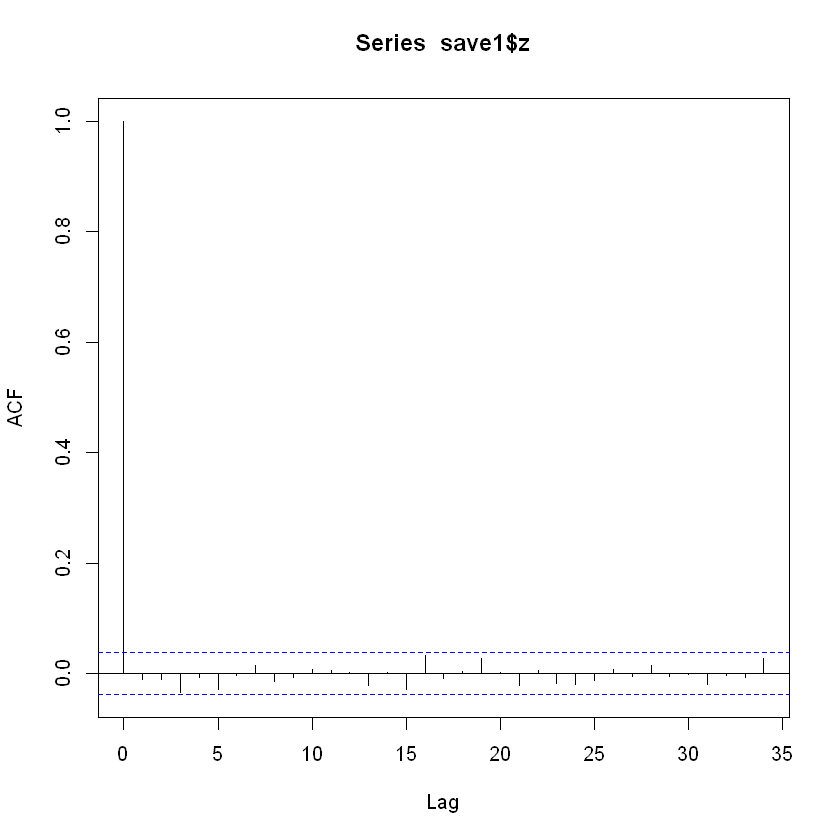

In [415]:
acf(save1$z)

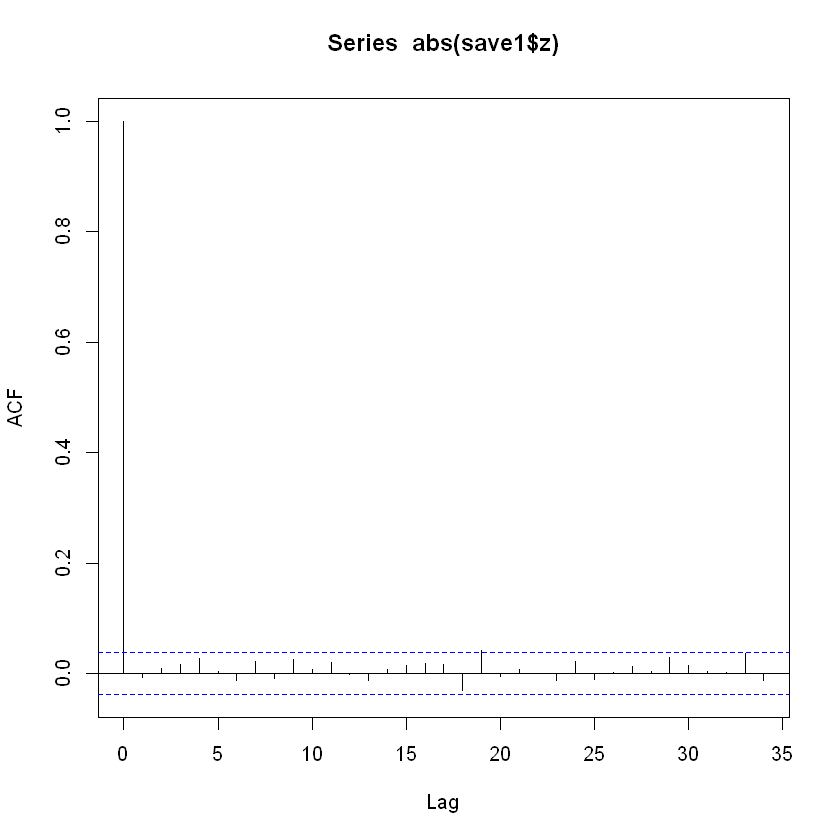

In [416]:
acf(abs(save1$z))

In [417]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution

# saving the model as garch.N

In [418]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution
garch.t <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "std")

fit.garch.t <- ugarchfit(spec = garch.t,data = logret)

fit.garch.t

# saving the model as garch.t


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000672    0.000128   5.2349 0.000000
omega   0.000003    0.000001   1.9335 0.053179
alpha1  0.106174    0.015072   7.0445 0.000000
beta1   0.857805    0.019462  44.0754 0.000000
shape   6.409577    0.797460   8.0375 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000672    0.000106  6.33229 0.000000
omega   0.000003    0.000005  0.58344 0.559599
alpha1  0.106174    0.030978  3.42736 0.000609
beta1   0.857805    0.053516 16.02909 0.000000
shape   6.409577    0.708369  9.04836 0.000000

LogLikelihood : 9085.876 

Information Criteria
------------------------------------
                 

In [419]:
# save Fitted Values
save2 <- cbind(logret,fit.garch.t@fit$sigma,fit.garch.t@fit$z)
names(save2) <- c("logret","s","z")

parm1 <- fit.garch.t@fit$coef

In [420]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save2$z),8)

sig <- round(sd(save2$z),8)

mu
sig

[1] -0.04473964

[1] 0.9940751

In [421]:
rvec <- as.vector(save2$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -0.32

In [422]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save2$z)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 4.34

In [423]:
# Jarque Bera test for normality

rvec <- as.vector(save2$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 237.92, p-value < 2.2e-16
alternative hypothesis: greater


In [424]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3+6/v-4 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

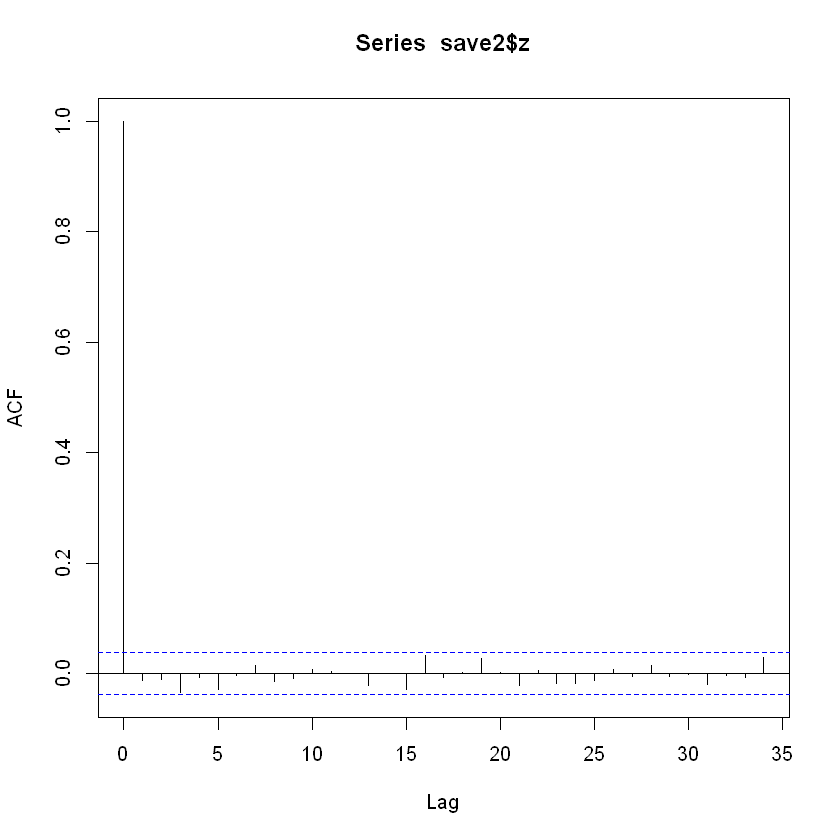

In [425]:
acf(save2$z)

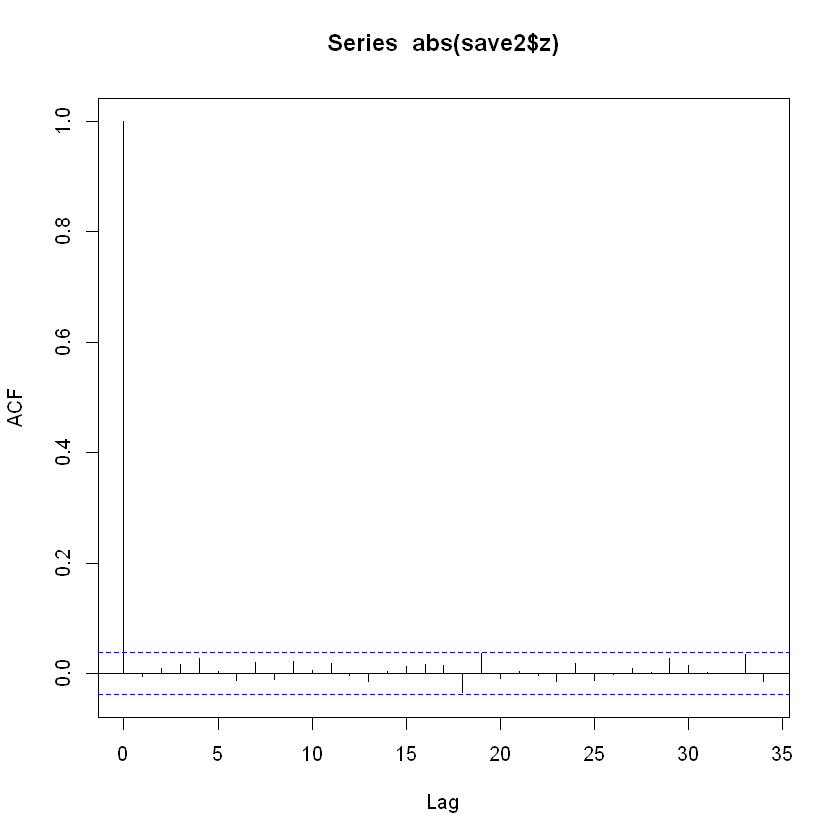

In [426]:
acf(abs(save2$z))

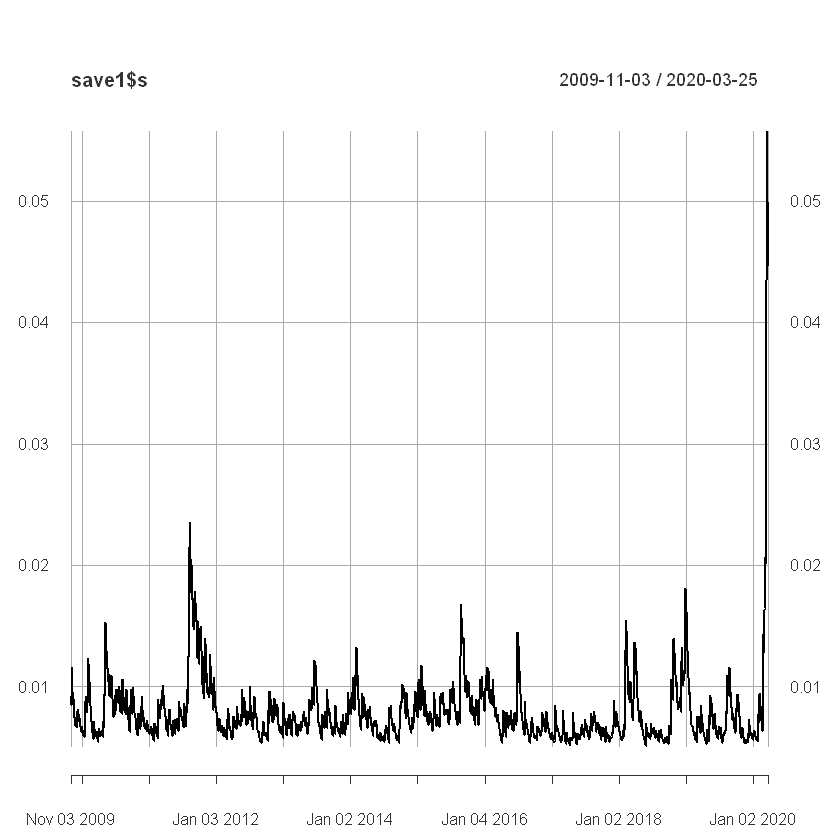

In [427]:
plot(save1$s)

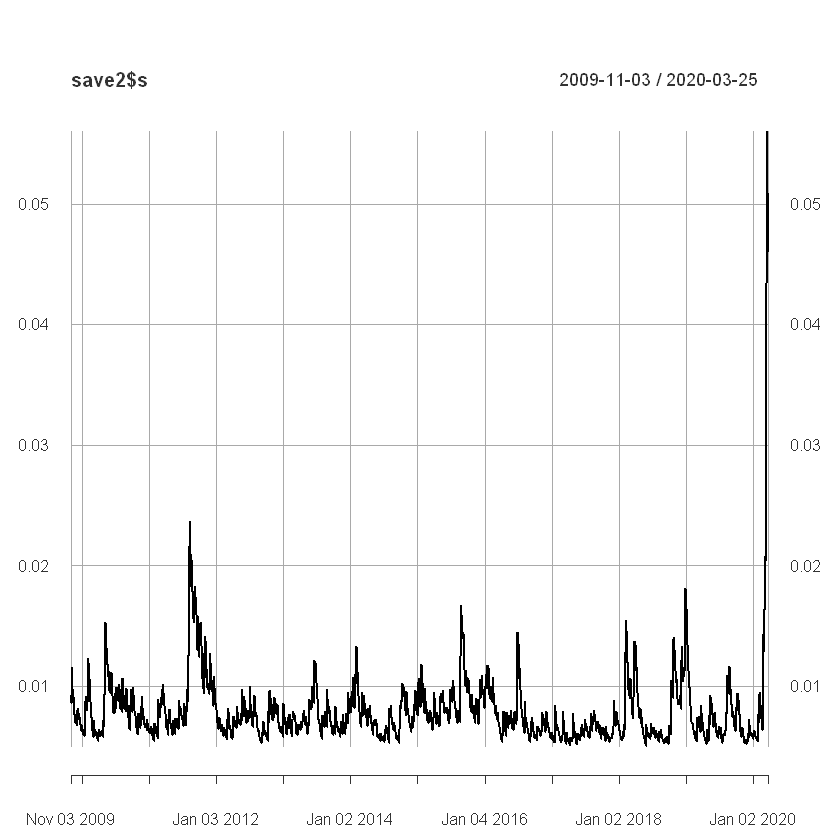

In [428]:
plot(save2$s)

In [429]:
#Graph of fiited sqr. root of ht in both cases - it denotes the volatility clustering in the Bitcoin Prices
# As the volatility is high VAR & ES are going to be High
# As the volatility is low VAR & ES are going to be Low
# So above VAR and ES are going to be high at aril 1,2020

In [430]:
#Now that we have estimated the GARCH model now we can now estimate it to Find VAR & ES using UGARCH boot function
# Simulate 1-day ahead with ugarchboot() fxn

#Simulate outcomes by bootstrapping from fited et of fit.garch.t
set.seed(123789)
boot.garch <- ugarchboot(fit.garch.t,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon # How many periods to simulate - Me the next day
                        n.bootpred=100000,     #number of simulations
                        solver="solnp") #Save it at boot.garch

In [431]:
#Calculate the VAR and ES from the simulated outcomes


rvec <- boot.garch@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR 
ES            # Prediction for 9-03-2021

5% 
-0.08095843

[1] -0.1107131

In [432]:
#Now that we have estimated the GARCH model now we can now estimate it to Find VAR & ES using UGARCH boot function
# Simulate 1-day ahead with ugarchboot() fxn

#Simulate outcomes by bootstrapping from fited et of fit.garch.t
set.seed(123789)
boot.garch1 <- ugarchboot(fit.garch.N,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon # How many periods to simulate - Me the next day
                        n.bootpred=100000,     #number of simulations
                        solver="solnp") #Save it at boot.garch

In [433]:
#Calculate the VAR and ES from the simulated outcomes


rvec <- boot.garch1@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR 
ES    

5% 
-0.07856919

[1] -0.1075047